# Model Evaluation

In [another report](http://localhost:8888/notebooks/build_regression_models.ipynb) we built three regression models and compared their performance. Here we choose one of the three models to predict the error vectors and evaluation its performance by visualizing the exprected and predicted error distortion maps.

In [1]:
# Load packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Load custom modules
from gen_stars import gen_stars
from dmap import dmap
from gen_d_params import gen_d_params
from custom_functions import prepare_data, train_predict, pol2cart, dmap_compare_v2

In [2]:
# Set the style of display
plt.style.use("ggplot")
%matplotlib inline

## Prepare the Data

In [3]:
# Create the training and test datasets from a given camera
camera = "mx"
image_nums_train = ["2"]
image_nums_test = ["3"]
X_train, y_train = prepare_data(camera, image_nums=image_nums_train)
X_test, y_test = prepare_data(camera, image_nums=image_nums_test)

# Create polynomial features
#pw_list = [2, 3]
#X_train = np.hstack((X_train, np.power(X_train,pw_list[0]), np.power(X_train,pw_list[1])))
#X_test = np.hstack((X_test, np.power(X_test,2), np.power(X_test,3)))

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 115 samples.
Testing set has 112 samples.


## Build a Regression Model

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# build a linear regression model
#clf = LinearRegression()

# build a GradientBoosting Regressor model
#clf = GradientBoostingRegressor(loss="ls", learning_rate=0.1, n_estimators=10, random_state=16)

# build a Random Forest model
clf = RandomForestRegressor(n_estimators=10, random_state=16)

# collect results on the model
samples_100 = len(X_train)
results = {}
clf_name = clf.__class__.__name__
clf = MultiOutputRegressor(clf)
results[clf_name] = train_predict(clf, samples_100, X_train, y_train, X_test, y_test)
yhat_train = results[clf_name]["yhat_train"]
yhat_test = results[clf_name]["yhat_test"]

MultiOutputRegressor trained on 115 samples.


## Create Distortion Maps

Here we create the distortion maps before and after correcting the error vectors. First we demonstrate the error corrections on image "mx2" (training data) and image "mx3" (testing data).

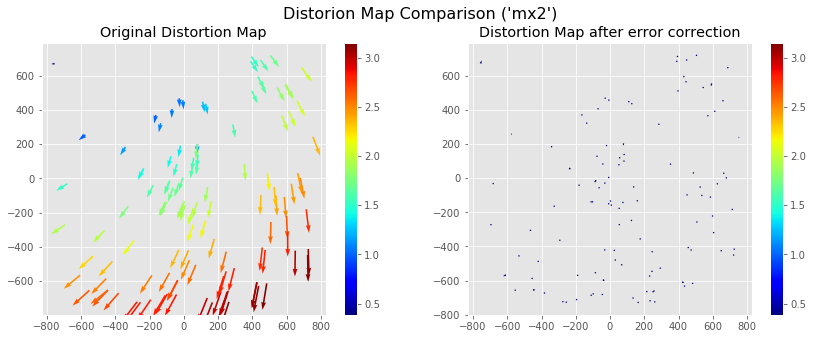

In [5]:
imgs_train = [camera + x for x in image_nums_train]
d_orig_train = gen_d_params(imgs_train)
dmap_compare_v2(d_orig_train, yhat_train, suptitle="Distorion Map Comparison " + "('mx2')")

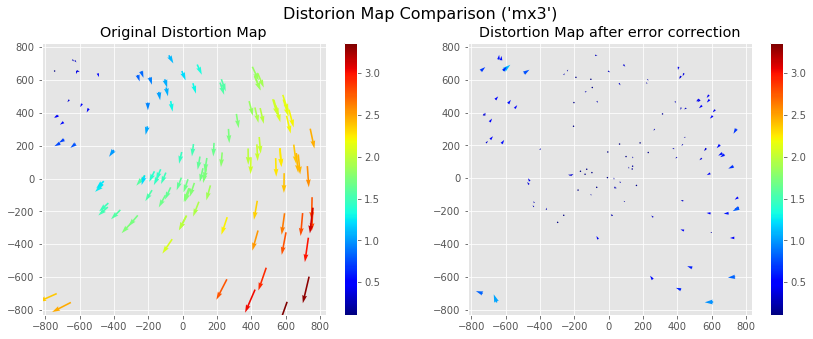

In [6]:
imgs_test = [camera + x for x in image_nums_test]
d_orig_test = gen_d_params(imgs_test)
dmap_compare_v2(d_orig_test, yhat_test, suptitle="Distorion Map Comparison " + "('mx3')")

The above results show that the error correction on the training and testing images ("mx2 and "mx3", respectively) are quite good.

Now we do the similer demo for two images from camera "px", image "px2" (training data) and image "px3" (testing data) 

Training set has 83 samples.
Testing set has 105 samples.
MultiOutputRegressor trained on 83 samples.


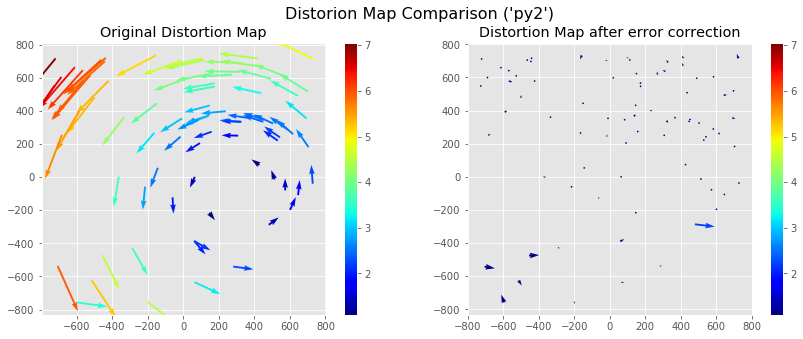

In [7]:
# Create the training and test datasets from a given camera
camera = "py"
image_nums_train = ["2"]
image_nums_test = ["3"]
X_train, y_train = prepare_data(camera, image_nums=image_nums_train)
X_test, y_test = prepare_data(camera, image_nums=image_nums_test)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

# build a Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
clf = RandomForestRegressor(n_estimators=10, random_state=16)

# collect results on the model
samples_100 = len(X_train)
results = {}
clf_name = clf.__class__.__name__
clf = MultiOutputRegressor(clf)
results[clf_name] = train_predict(clf, samples_100, X_train, y_train, X_test, y_test)
yhat_train = results[clf_name]["yhat_train"]
yhat_test = results[clf_name]["yhat_test"]

imgs_train = [camera + x for x in image_nums_train]
d_orig_train = gen_d_params(imgs_train)
dmap_compare_v2(d_orig_train, yhat_train, suptitle="Distorion Map Comparison " + "('py2')")

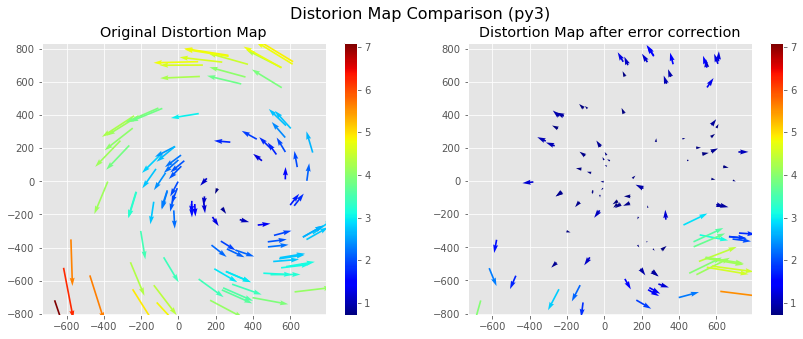

In [8]:
imgs_test = [camera + x for x in image_nums_test]
d_orig_test = gen_d_params(imgs_test)
dmap_compare_v2(d_orig_test, yhat_test, suptitle="Distorion Map Comparison " + "(py3)")

The above plots show that the error correction results on camera "py" are not as good as those on camera "mx". 